In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import matplotlib as mpl
import random
import seaborn as sns
from scipy import interpolate

In [3]:
mpl.rcParams['pdf.fonttype'] = 42
# Set font and set mathtext font the same with text font
mpl.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
mpl.rcParams['mathtext.default'] = 'regular'
# Set tick size globally
# Set tick size globally
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['legend.fontsize'] = 12
plt.close("all")


In [4]:
####  Fig. 3,4 MCMC inversion results

In [119]:
# read the proxy data
d13c_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd13c_carbonate', index_col = 'Age')
# trim the data
d13c_proxy = d13c_proxy[d13c_proxy.index>=251.902 ]
d13c_proxy = d13c_proxy[d13c_proxy.index<=252.00 ]
d13c_sm = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd13c_sm')
d13c_proxy['fsilw11'] = d13c_proxy['d13c'] - 2.9256 

d18o_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd18o', index_col = 'Age')
d18o_proxy = d18o_proxy[d18o_proxy.index>=251.902 ]
d18o_proxy = d18o_proxy[d18o_proxy.index<=252.00 ]
d18o_sm = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd18o_sm', index_col = 'Age')
d18o_sm = d18o_sm[d18o_sm.index>= 251.902 ]
d18o_sm = d18o_sm[d18o_sm.index<= 252.001 ]

d18o_meishan = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'd18o', index_col = 'Age')
d18o_meishan = d18o_meishan[d18o_meishan['Section']=='Meishan']
d18o_meishan = d18o_meishan[d18o_meishan['reference']=='Chen et al., 2016']



ph_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'pH')


pco2_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Normalized pCO2')
pco2_proxy.loc[pco2_proxy.Age>252.0, 'Age']=252.005
pco2_proxy.loc[pco2_proxy.Age==251.89, 'Age']=251.898
# pco2_proxy['low_sd'] = pco2_proxy['pCO2'] - pco2_proxy['pCO2_low']
# pco2_proxy['high_sd'] = pco2_proxy['pCO2_high'] - pco2_proxy['pCO2']
 
sr_meishan_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Sr_Meishan')
sr_curve = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Sr_curve', skiprows=[1])

d18o_proxy['Relative_T'] = (d18o_proxy['d18O'] - 19.98493008) * -4.22

In [6]:
# check section information, for the convenience of legend plotting

ls_c = d13c_proxy['Section'].unique()
ls_o = d18o_proxy['Section'].unique()

random.seed(8)
default = sns.color_palette("Set2", len(ls_c))

seq = random.sample(range(len(ls_c)),len(ls_c))
d13c_palette = {
    ls_c[i]: default[j] for i, j in zip(range(len(ls_c)), seq)
}
d18o_palette = {
    ls_o[i]: [] for i in range(len(ls_o))
}
pco2_palette = {
    'Shangsi': d13c_palette['Shangsi']
}

In [244]:
# compile results from 2000 forward experiments
exp_name = 'd13c_sens_test_Meishan' 

# exp_name = 'd13c_sens_test_nsi_6'
 

folder = 'd13c_mcmc_results'

# d13c_emi_mcmc = np.loadtxt(f'./mcmc_results_processing/d13c_emi_inv_{exp_name}.dat').T

# forcings
# m, n = d13c_emi_mcmc.shape
n = len(next(os.walk(f'./{folder}/{exp_name}'))[1])
samples = np.load(f'./{folder}/{exp_name}.npy')
pr = np.loadtxt(f'./{folder}/ln_{exp_name}.dat')
index = pr.argsort()[-n:][::-1]
forcing_mcmc = samples[index,:].T



try:
    temp_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'Temperature', index_col = [0])
    
    pco2_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'pco2', index_col = [0])
    d13c_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'd13c', index_col = [0])
    ph_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'ph', index_col = [0])
    dox_interm_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'dox_interm', index_col = [0])
    dox_deep_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'dox_deep', index_col = [0])
    po4_ave_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'po4_ave', index_col = [0])
    sr_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'sr', index_col = [0])
    
    r_fsilw_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fsilw', index_col = [0])
    r_fcarbw_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fcarbw', index_col = [0])

    r_fpw_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fpw', index_col = [0])
    r_ffep_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_ffep', index_col = [0])
    r_fcap_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'r_fcap', index_col = [0])
    
    
    fbP_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'FbP', index_col = [0])
    forgp_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'ForgP', index_col = [0])
    focb_mcmc = pd.read_excel(f'./data/mcmc_{exp_name}_results.xlsx', sheet_name = 'ForgC', index_col = [0])
    
except:

    Age = np.round(np.arange(-252e6, -251.90e6,2e3),3)
    temp_mcmc = pd.DataFrame(index = Age)
    temp_mcmc.index.name = 'Age'

    pco2_mcmc = pd.DataFrame(index = Age)
    pco2_mcmc.index.name = 'Age'

    d13c_mcmc = pd.DataFrame(index = Age)
    d13c_mcmc.index.name = 'Age'

    ph_mcmc = pd.DataFrame(index = Age)
    ph_mcmc.index.name = 'Age'

    dox_interm_mcmc = pd.DataFrame(index = Age)
    dox_interm_mcmc.index.name = 'Age'

    dox_deep_mcmc = pd.DataFrame(index = Age)
    dox_deep_mcmc.index.name = 'Age'

    po4_ave_mcmc = pd.DataFrame(index = Age)
    po4_ave_mcmc.index.name = 'Age'

    sr_mcmc = pd.DataFrame(index = Age)
    sr_mcmc.index.name = 'Age'
    
    r_fsilw_mcmc = pd.DataFrame(index = Age)
    r_fsilw_mcmc.index.name = 'Age'
    
    r_fcarbw_mcmc = pd.DataFrame(index = Age)
    r_fcarbw_mcmc.index.name = 'Age'
    
    r_fpw_mcmc = pd.DataFrame(index = Age)
    r_fpw_mcmc.index.name = 'Age'
    
    r_ffep_mcmc = pd.DataFrame(index = Age)
    r_ffep_mcmc.index.name = 'Age'
    
    r_fcap_mcmc = pd.DataFrame(index = Age)
    r_fcap_mcmc.index.name = 'Age'
    
    forgp_mcmc = pd.DataFrame(index = Age)
    forgp_mcmc.index.name = 'Age'
    
    fbP_mcmc = pd.DataFrame(index = Age)
    fbP_mcmc.index.name = 'Age'
    
    focb_mcmc = pd.DataFrame(index = Age)
    focb_mcmc.index.name = 'Age'
    

   

    for i in range(n):
       
                    
        try:
            temp_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/tcb.csv', usecols = [1]).values-22
            pco2_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/pco2_d13c.csv', usecols = [1]).values
            d13c_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Surface_dic_alk_d13c_ph_dox.csv', usecols = [3]).values
            ph_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Surface_dic_alk_d13c_ph_dox.csv', usecols = [4]).values
            dox_interm_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Surface_dic_alk_d13c_ph_dox.csv', usecols = [6]).values
            dox_deep_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Surface_dic_alk_d13c_ph_dox.csv', usecols = [7]).values
            po4_ave_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Surface_dic_alk_d13c_ph_dox.csv', usecols = [8]).values

            sr_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/Sr.csv', usecols = [1]).values
            
            r_fsilw_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [2]).values
            r_fcarbw_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [3]).values
            r_fpw_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [4]).values
            
            r_ffep_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [5]).values
            r_fcap_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [6]).values
            
            forgp_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [7]).values
            focb_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/flux.csv', usecols = [8]).values
            
            fbP_mcmc[f'rank{i}'] = r_ffep_mcmc[f'rank_{i}'].values*1.74e10 + r_fcap_mcmc[f'rank_{i}'].values*7.04e10/2 + forgp_mcmc[f'rank_{i}'].values
        except:
            continue
    writer = pd.ExcelWriter(f'./data/mcmc_{exp_name}_results.xlsx')
    temp_mcmc.to_excel(writer,sheet_name='Temperature')
    pco2_mcmc.to_excel(writer,sheet_name='pco2')
    d13c_mcmc.to_excel(writer,sheet_name='d13c')
    ph_mcmc.to_excel(writer,sheet_name='ph')
    dox_interm_mcmc.to_excel(writer,sheet_name='dox_interm')
    dox_deep_mcmc.to_excel(writer,sheet_name='dox_deep')
    po4_ave_mcmc.to_excel(writer,sheet_name='po4_ave')
    sr_mcmc.to_excel(writer,sheet_name='sr')
    r_fsilw_mcmc.to_excel(writer,sheet_name='r_fsilw')
    r_fcarbw_mcmc.to_excel(writer,sheet_name='r_fcarbw')
    r_fpw_mcmc.to_excel(writer,sheet_name='r_fpw')
    r_ffep_mcmc.to_excel(writer,sheet_name='r_ffep')
    r_fcap_mcmc.to_excel(writer,sheet_name='r_fcap')
    
    forgp_mcmc.to_excel(writer,sheet_name='ForgP')
    focb_mcmc.to_excel(writer,sheet_name='ForgC')
    fbP_mcmc.to_excel(writer, sheet_name='FbP')

    writer.save()

C:\Users\shihan\AppData\Local\Temp/ipykernel_24604/1458346276.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/tcb.csv', usecols = [1]).values-22
C:\Users\shihan\AppData\Local\Temp/ipykernel_24604/1458346276.py:103: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pco2_mcmc[f'rank_{i}'] = pd.read_csv(f'./{folder}/{exp_name}/{i}/pco2_d13c.csv', usecols = [1]).values
C:\Users\shihan\AppData\Local\Temp/ipykernel_24604/1458346276.py:104: PerformanceWarning: DataFra

In [245]:
# get the quantile
temp_q = temp_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
pco2_q = pco2_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
ph_q = ph_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
sr_q = sr_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
dox_interm_q = dox_interm_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
dox_deep_q =  dox_deep_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
d13c_q = d13c_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
po4_ave_q = po4_ave_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T

r_fsilw_q = r_fsilw_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_fcarbw_q = r_fcarbw_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_fpw_q = r_fpw_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_ffep_q = r_ffep_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
r_fcap_q = r_fcap_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T

forgp_q = forgp_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
focb_q = focb_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T
fbP_q = fbP_mcmc.quantile([0.025, 0.5, 0.975], axis = 1).T

writer = pd.ExcelWriter(f'./data/mcmc_{exp_name}_quantile_results.xlsx')
(temp_q-temp_q.iloc[0,:]).to_excel(writer,sheet_name='Temperature')
pco2_q.to_excel(writer,sheet_name='pco2')
d13c_q.to_excel(writer,sheet_name='d13c')
(ph_q - ph_q.iloc[0,:]).to_excel(writer,sheet_name='ph')
dox_interm_q.to_excel(writer,sheet_name='dox_interm')
dox_deep_q.to_excel(writer,sheet_name='dox_deep')
po4_ave_q.to_excel(writer,sheet_name='po4_ave')
sr_q.to_excel(writer,sheet_name='sr')
r_fsilw_q.to_excel(writer,sheet_name='r_fsilw')
r_fcarbw_q.to_excel(writer,sheet_name='r_fcarbw')
r_fpw_q.to_excel(writer,sheet_name='r_fpw')
r_ffep_q.to_excel(writer,sheet_name='r_ffep')
r_fcap_q.to_excel(writer,sheet_name='r_fcap')
forgp_q.to_excel(writer,sheet_name='ForgP')
focb_q.to_excel(writer,sheet_name='ForgC')
fbP_q.to_excel(writer,sheet_name='FbP')

writer.save()

In [246]:
pco2_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Normalized pCO2')
pco2_proxy.loc[pco2_proxy.Age>252.0, 'Age']=252.005
pco2_proxy.loc[pco2_proxy.Age==251.89, 'Age']=251.898
scale = 1.4
pco2_proxy.iloc[38:46,6] *= scale
pco2_proxy.iloc[38:46,8] *= scale
pco2_proxy.iloc[38:46,10] *= scale
pco2_proxy.iloc[38:46,:]

,Age,pCO2,pCO2_low,pCO2_high,proxy,background,normalized,normalized_low,low_sd,normalized_high,high_sd,Ref
38,251.894366,693.171720,676.556254,731.941141,"Phytane, ref. 22",270.37,3.589305,2.502335,0.086036,2.707183,0.200752,"Shen et al., 2023"
39,251.900947,607.301904,592.744755,641.268585,"Phytane, ref. 22",270.37,3.144663,2.192347,0.075378,2.371819,0.175883,"Shen et al., 2023"
40,251.902000,576.793596,562.967737,609.053933,"Phytane, ref. 22",270.37,2.986689,2.082212,0.071592,2.252668,0.167047,"Shen et al., 2023"
41,251.910571,582.275852,568.318582,614.842814,"Phytane, ref. 22",270.37,3.015076,2.102003,0.072272,2.274079,0.168635,"Shen et al., 2023"
42,251.920214,388.717227,379.399597,410.458365,"Phytane, ref. 22",270.37,2.012813,1.403261,0.048248,1.518136,0.112578,"Shen et al., 2023"
43,251.927714,358.146840,349.561988,378.178161,"Phytane, ref. 22",270.37,1.854516,1.292902,0.044453,1.398743,0.103724,"Shen et al., 2023"
44,251.940036,270.364924,263.884222,285.486561,"Phytane, ref. 22",270.37,1.399974,0.976011,0.033558,1.055911,0.078301,"Shen et al., 2023"
45,251.950000,386.015337,376.762471,407.605356,"Phytane, ref. 22",270.37,1.998822,1.393507,0.047912,1.507584,0.111795,"Shen et al., 2023"


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


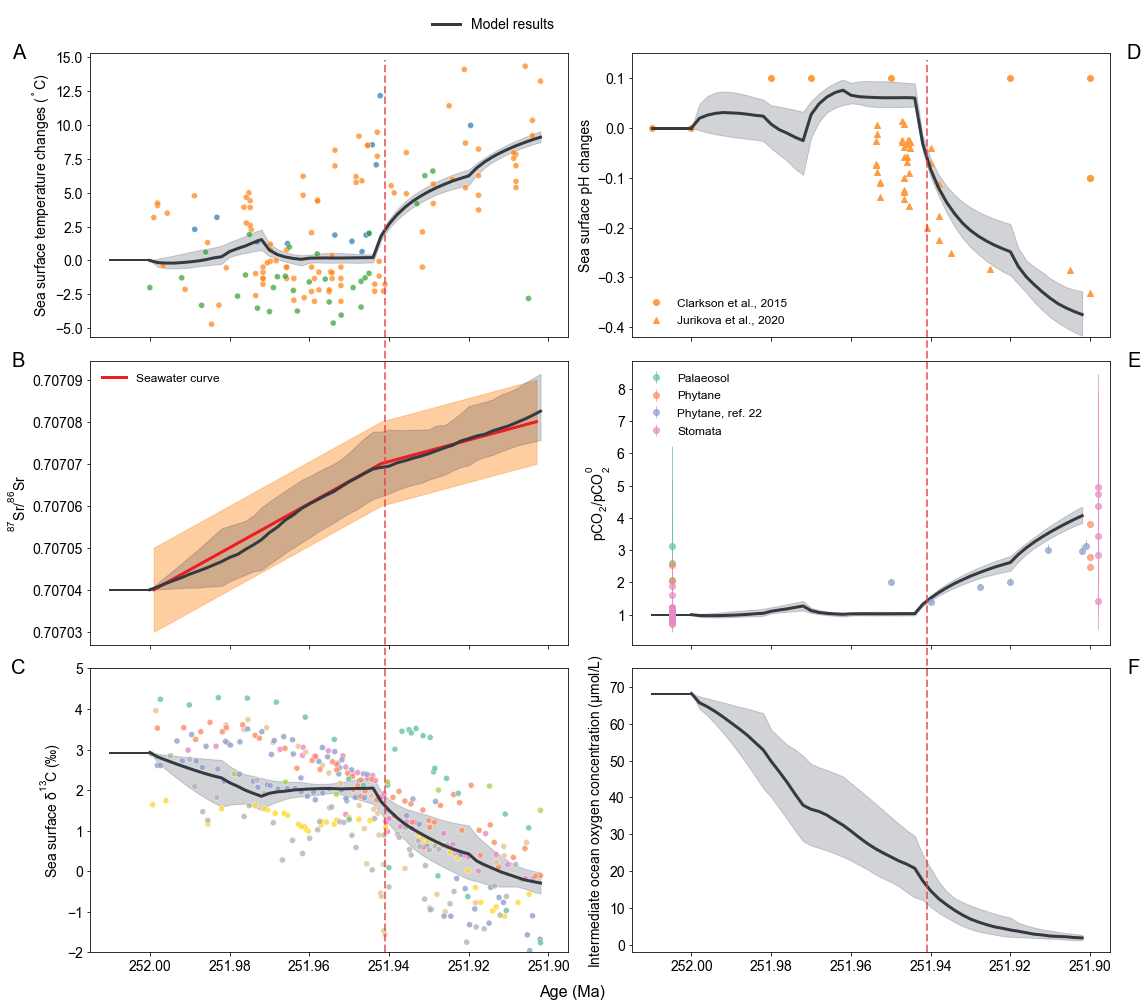

In [247]:

# # model results best fit with constant E
# temp_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/tcb.csv', usecols = [1]).values-22
# sr_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Sr.csv', usecols = [1]).values
# ph_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [4]).values
# pco2_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/pco2_d13c.csv', usecols = [1]).values
# dox_interm_const_e =  pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [6]).values
# dox_deep_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [7]).values
     

savefig = 1
deepflag = 0
version = 'v11'


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14


fig, axes = plt.subplots(figsize = (16,14),nrows=3, ncols=2, sharex=True)

plt.ticklabel_format(useOffset=False)

proxy_color = '#ED1B24'
proxy_interval = '#FE9C43'
model_color = '#343a40'
model_interval = '#1b263b'


alpha_scatter = 0.8

alpha = 0.2

# Fig. 1 Temperature
axes[0,0].plot([252.01, (temp_q.index/-1e6)[0]], [0,0], lw = 2, color = model_color)
axes[0,0].plot(temp_q.index/-1e6, temp_q.iloc[:,1], lw = 3, color = model_color, label = 'Model results')
axes[0,0].fill_between(temp_q.index/-1e6, temp_q.iloc[:,0], temp_q.iloc[:,2], color = model_interval, alpha = alpha)
# axes[0].plot(pd_wu.index, pd_wu['T'], color = model_color, lw = 3, ls = '--', label = 'Wu et al., 2023')
# axes[0].plot(t_const_e/-1e6, temp_const_e, lw = 3, ls = '--', color = model_color, label = 'Constant erosion')

# if exp_name == 'sens_test_Meishan':
#     axes[0,0].scatter(d18o_meishan.index, (d18o_meishan.d18O - 20.42627)*-4.22, c = proxy_color, s = 10)
# else:

#     axes[0,0].fill_between(temp_q.index/-1e6, temp_q.iloc[:,0], temp_q.iloc[:,2], color = model_interval, alpha = alpha)
#     axes[0,0].plot(d18o_sm.index, (d18o_sm.d18o_mean - 19.984930)*-4.22,lw = 3, color = proxy_color, label = 'Proxy values')
#     axes[0,0].fill_between(d18o_sm.index,(d18o_sm.d18o_mean - 19.984930)*-4.22- d18o_sm['std']*4.22,
#                          (d18o_sm.d18o_mean - 19.984930)*-4.22+ d18o_sm['std']*4.22, color = proxy_interval, alpha = 0.5) 

sns.scatterplot(x='Age', y='Relative_T', hue='region', data=d18o_proxy, ax = axes[0,0], legend= 'full', alpha = .7) 
    
# Fig. 2 Sr
axes[1,0].plot(sr_curve.Age, sr_curve['87Sr/86Sr'],lw = 3, color = proxy_color, label = 'Seawater curve')

# axes[1].plot(t_const_e/-1e6, sr_const_e, lw = 3, ls = '--', color = model_color)

axes[1,0].fill_between(sr_curve.Age, sr_curve['87Sr/86Sr']-sr_curve['Uncertainty'], sr_curve['87Sr/86Sr']+sr_curve['Uncertainty'], color = proxy_interval, alpha = 0.5)

axes[1,0].plot(sr_q.index/-1e6, sr_q.iloc[:,1], lw = 3, color = model_color)
axes[1,0].plot([252.01, (sr_q.index/-1e6)[0]], [0.707040, 0.707040], lw = 2, color = model_color)

axes[1,0].fill_between(sr_q.index/-1e6, sr_q.iloc[:,0], sr_q.iloc[:,2], color = model_interval, alpha = alpha)

axes[1,0].ticklabel_format(useOffset=False)



# C. d13c
axes[2,0].plot([252.01, (d13c_q.index/-1e6)[0]], [2.9256,2.9256], lw = 2, color = model_color)

axes[2,0].plot(d13c_q.index/-1e6, d13c_q.iloc[:,1], lw = 3, color = model_color, label = 'Model results')
axes[2,0].fill_between(d13c_q.index/-1e6, d13c_q.iloc[:,0], d13c_q.iloc[:,2], color = model_interval, alpha = alpha)
# ss = sns.scatterplot(x='Age', y='d13c', hue='Section', data=d13c_proxy, palette = d13c_palette, ax = axes[2,0], legend= False, alpha = alpha_scatter) 
ss = sns.scatterplot(x='Age', y='d13c', hue='Section', data=d13c_proxy, palette = d13c_palette, ax = axes[2,0], legend= False, alpha = alpha_scatter) 


axes[2,0].set_ylim([-2, 5])
axes[2,0].set_xlabel('')

# Fig. 3 pCO2
# axes[2].set_yscale("log")
normalization = 425
axes[1,1].plot(pco2_q.index/-1e6, pco2_q.iloc[:,1]/normalization , lw = 3, color = model_color)
axes[1,1].plot([252.01, (pco2_q.index/-1e6)[0]], [425/normalization , 425/normalization ], lw = 2, color = model_color)

# axes[2].plot(t_const_e/-1e6, pco2_const_e, lw = 3, ls = '--', color = model_color)


axes[1,1].fill_between(pco2_q.index/-1e6, pco2_q.iloc[:,0]/normalization , pco2_q.iloc[:,2]/normalization , color = model_interval, alpha = alpha)

random.seed(8)
default = sns.color_palette("Set2", 4)
if normalization == 1 or 425:
    groups = pco2_proxy.groupby('proxy')
    i = 0
    for Age, group in groups:

#         if (group['proxy'] == 'Phytane, Shen et al., 2023').any():
#             group['pCO2'] = group['pCO2']/270
#             group['low_sd'] = group['low_sd']/270
#             group['high_sd'] = group['high_sd']/270
#         else:
#             group['pCO2'] = group['pCO2']/normalization
#             group['low_sd'] = group['low_sd']/normalization
#             group['high_sd'] = group['high_sd']/normalization
        
        group.plot("Age", "normalized", yerr = group[["low_sd", "high_sd"]].T.values , alpha = 0.7,
                   marker = "o", markersize = 6, c = default[i], elinewidth=1, ls = "", label = Age, ax = axes[1,1])
        i+=1
else:
    groups = pco2_proxy.groupby('Ref')
    for Age, group in groups:

        group.plot("Age", "normalized", yerr = group[["low", "high"]].T.values, 
                   marker = "o", markersize = 6, elinewidth=1, ls = "", label = Age,ax = axes[1,1])


# axes[1,1].errorbar(pco2_proxy.Age, pco2_proxy.normalized, yerr=pco2_proxy.low, fmt="o", 
#                    markerfacecolor=proxy_interval, alpha = 0.8,  markeredgewidth=0,
#                   ecolor = proxy_color)

# Fig. 4 pH
axes[0,1].plot(ph_q.index/-1e6, ph_q.iloc[:,1]-ph_q.iloc[0,1], lw = 3, color = model_color)
# axes[3].plot(t_const_e/-1e6, ph_const_e - ph_const_e[0], lw = 2, ls = '--', color = model_color)
axes[0,1].plot([252.01, (ph_q.index/-1e6)[0]], [0, 0], lw = 3, color = model_color)

axes[0,1].fill_between(ph_q.index/-1e6, ph_q.iloc[:,0]-7.9325, ph_q.iloc[:,2]-7.9325, color = model_interval, alpha = alpha)
# axes[0,1].fill_between(ph_q.index/-1e6, ph_q.iloc[:,0]-7.9663, ph_q.iloc[:,2]-7.9663, color = model_interval, alpha = alpha)

axes[0,1].scatter(ph_proxy.Age, ph_proxy.clarkson_relative, marker= 'o', color = proxy_interval, label = 'Clarkson et al., 2015')
axes[0,1].scatter(ph_proxy.AgeJ, ph_proxy.J_relative, marker = '^', color = proxy_interval, label = 'Jurikova et al., 2020')
# axes[3].plot(pd_wu.index, pd_wu.pH, ls = '--', lw = 3, color = model_color)

handles, labels = axes[0,1].get_legend_handles_labels()

axes[0,1].legend(handles[:] , labels[:] ,
              loc = 'lower left', 
              framealpha = 0, 
              borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=12) 
axes[0,1].set_ylim([-0.42,0.15])
# axes[0,1].set_ylim([-0.65,0.2])

# Fig. 5 dox
if deepflag:
    axes[2,1].plot(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,1]*1e3, lw = 3, color = model_color)
    axes[2,1].plot([252.01, (dox_deep_q.index/-1e6)[0]], [127.40, 127.40], lw = 2, color = model_color)

#     axes[4].plot(t_const_e/-1e6, dox_deep_const_e, lw = 3, ls = '--', color = model_color)

    axes[2,1].fill_between(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,0], dox_deep_q.iloc[:,2], color = model_interval, alpha = alpha)

    # single inversion best fit
#     axes[4].plot(dox_deep.index, dox_deep[best_scenario], lw = 3, color = proxy_interval, ls = '--', label = 'best T scenario')
else:
    axes[2,1].plot(dox_interm_q.index/-1e6, dox_interm_q.iloc[:,1]*1e3, lw = 3, color = model_color)
    axes[2,1].plot([252.01, (dox_interm_q.index/-1e6)[0]], [68.20, 68.20], lw = 2, color = model_color)

#     axes[4].plot(t_const_e/-1e6, dox_interm_const_e, lw = 3, ls = '--', color = model_color)
    
    axes[2,1].fill_between(dox_interm_q.index/-1e6, dox_interm_q.iloc[:,0]*1e3, dox_interm_q.iloc[:,2]*1e3, color = model_interval, alpha = alpha)

# single inversion best fit
#     axes[4].plot(dox_interm.index, dox_interm[best_scenario], lw = 3, color = proxy_interval, ls = '--', label = 'best T scenario')
# axes[4].plot(dox_deep.index, dox_deep[best_sr_scenario], lw =3, color = proxy_interval, ls = 'dotted', label = r'best $^{87}$Sr/$^{86}$Sr scenario')
# handles, labels = axes[4].get_legend_handles_labels()

# axes[4].legend(handles[:] , labels[:] ,
#               loc = 'lower right', 
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12) 


# yaxis
axes[0,0].set_ylabel(r'Sea surface temperature changes ($^\circ$C)')
axes[1,0].set_ylabel(r'$^{87}Sr$/$^{86}Sr$')
axes[2,0].set_ylabel(r"Sea surface $\delta^{13}\!C$ (" + u"\u2030" + ")")
if normalization ==425:
    axes[1,1].set_ylabel(r'pCO$_2$/pCO$_2^0$ ')
else:
        
    axes[1,1].set_ylabel(r'pCO$_2$ (ppmv)')
axes[0,1].set_ylabel('Sea surface pH changes')
if deepflag:
    axes[2,1].set_ylabel(r'Deep ocean oxygen concentration ($\mu$mol/L)')
    
else:
    axes[2,1].set_ylabel(r'Intermediate ocean oxygen concentration ($\mu$mol/L)')
    axes[2,1].set_ylim([-2,75])
        
# ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# axes[3].set_ylabel('Cumulative emissions (Gt C)')
# axes[0].set_ylim([-2,10])



# xaxis
fig.supxlabel('Age (Ma)', fontsize = 16)

# x range
plt.setp(axes, xlim=[251.895, 252.015])

# # legend

handles, labels = axes[0,0].get_legend_handles_labels()

axes[0,0].legend(handles[0:1] , labels[0:1] ,
               loc = 'center right', bbox_to_anchor = (1.0,1.1),
              framealpha = 0, 
              borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=14) 

axes[1,0].legend( borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=12, loc = 'upper left')
axes[2,0].plot([251.941, 251.941], [-2, 20], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)
axes[2,1].plot([251.941, 251.941], [-2, 240], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

handles, labels = axes[1,1].get_legend_handles_labels()

axes[1,1].legend(handles , labels ,
              loc = 'upper left', 
              framealpha = 0, 
              borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
                  edgecolor='white', fontsize=12) 


axes[0,0].text(-0.15, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0,0].transAxes)
axes[1,0].text(-0.15, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1,0].transAxes)
axes[2,0].text(-0.15, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2,0].transAxes)
axes[0,1].text(1.05, 1.0, 'D', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0,1].transAxes)
axes[1,1].text(1.05, 1.0, 'E', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1,1].transAxes)
axes[2,1].text(1.05, 1.0, 'F', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2,1].transAxes)


plt.gca().invert_xaxis()


plt.tight_layout()

if savefig:
    plt.savefig(f'Fig3_{exp_name}_{deepflag}_{version}.png', facecolor='w', dpi = 300)
    plt.savefig(f'Fig3_{exp_name}_{deepflag}_{version}.pdf', dpi = 1200)
    plt.savefig(f'Fig3_{exp_name}_{deepflag}_{version}.svg', format = 'svg', dpi = 1200)


In [248]:
# pco2_proxy = pd.read_excel('./data/S1_Early_PTB.xlsx', sheet_name = 'Normalized pCO2')
# pco2_proxy.loc[pco2_proxy.Age>252.0, 'Age']=252.005
# pco2_proxy.loc[pco2_proxy.Age==251.89, 'Age']=251.898
# scale = 1
# pco2_proxy.iloc[38:46,6] *= scale
# pco2_proxy.iloc[38:46,8] *= scale
# pco2_proxy.iloc[38:46,10] *= scale
# pco2_proxy.iloc[38:46,:]

In [249]:
# ####### twin axes for pco2


# # # model results best fit with constant E
# # temp_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/tcb.csv', usecols = [1]).values-22
# # sr_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Sr.csv', usecols = [1]).values
# # ph_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [4]).values
# # pco2_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/pco2_d13c.csv', usecols = [1]).values
# # dox_interm_const_e =  pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [6]).values
# # dox_deep_const_e = pd.read_csv(f'./mcmc_results_processing/sens_test_sclim_4_with_const_erosion/Surface_dic_alk_d13c_ph_dox.csv', usecols = [7]).values
     

# savefig = 0
# deepflag = 0
# version = 'v9'




# fig, axes = plt.subplots(figsize = (16,12),nrows=3, ncols=2, sharex=True)

# plt.ticklabel_format(useOffset=False)

# proxy_color = '#ED1B24'
# proxy_interval = '#FE9C43'
# model_color = '#343a40'
# model_interval = '#1b263b'


# alpha_scatter = 0.8

# alpha = 0.2

# # Fig. 1 Temperature
# axes[0,0].plot([252.01, (temp_q.index/-1e6)[0]], [0,0], lw = 2, color = model_color)
# axes[0,0].plot(temp_q.index/-1e6, temp_q.iloc[:,1], lw = 3, color = model_color, label = 'Model results')
# axes[0,0].fill_between(temp_q.index/-1e6, temp_q.iloc[:,0], temp_q.iloc[:,2], color = model_interval, alpha = alpha)
# # axes[0].plot(pd_wu.index, pd_wu['T'], color = model_color, lw = 3, ls = '--', label = 'Wu et al., 2023')
# # axes[0].plot(t_const_e/-1e6, temp_const_e, lw = 3, ls = '--', color = model_color, label = 'Constant erosion')

# # if exp_name == 'sens_test_Meishan':
# #     axes[0,0].scatter(d18o_meishan.index, (d18o_meishan.d18O - 20.42627)*-4.22, c = proxy_color, s = 10)
# # else:

# #     axes[0,0].fill_between(temp_q.index/-1e6, temp_q.iloc[:,0], temp_q.iloc[:,2], color = model_interval, alpha = alpha)
# #     axes[0,0].plot(d18o_sm.index, (d18o_sm.d18o_mean - 19.984930)*-4.22,lw = 3, color = proxy_color, label = 'Proxy values')
# #     axes[0,0].fill_between(d18o_sm.index,(d18o_sm.d18o_mean - 19.984930)*-4.22- d18o_sm['std']*4.22,
# #                          (d18o_sm.d18o_mean - 19.984930)*-4.22+ d18o_sm['std']*4.22, color = proxy_interval, alpha = 0.5) 

# sns.scatterplot(x='Age', y='Relative_T', hue='region', data=d18o_proxy, ax = axes[0,0], legend= 'full', alpha = .7) 
    
# # Fig. 2 Sr
# axes[1,0].plot(sr_curve.Age, sr_curve['87Sr/86Sr'],lw = 3, color = proxy_color, label = 'Seawater curve')

# # axes[1].plot(t_const_e/-1e6, sr_const_e, lw = 3, ls = '--', color = model_color)

# axes[1,0].fill_between(sr_curve.Age, sr_curve['87Sr/86Sr']-sr_curve['Uncertainty'], sr_curve['87Sr/86Sr']+sr_curve['Uncertainty'], color = proxy_interval, alpha = 0.5)

# axes[1,0].plot(sr_q.index/-1e6, sr_q.iloc[:,1], lw = 3, color = model_color)
# axes[1,0].plot([252.01, (sr_q.index/-1e6)[0]], [0.707040, 0.707040], lw = 2, color = model_color)

# axes[1,0].fill_between(sr_q.index/-1e6, sr_q.iloc[:,0], sr_q.iloc[:,2], color = model_interval, alpha = alpha)

# axes[1,0].ticklabel_format(useOffset=False)



# # C. d13c
# axes[2,0].plot([252.01, (d13c_q.index/-1e6)[0]], [2.9256,2.9256], lw = 2, color = model_color)
# axes[2,0].plot(d13c_q.index/-1e6, d13c_q.iloc[:,1], lw = 3, color = model_color, label = 'Model results')
# axes[2,0].fill_between(d13c_q.index/-1e6, d13c_q.iloc[:,0], d13c_q.iloc[:,2], color = model_interval, alpha = alpha)
# ss = sns.scatterplot(x='Age', y='d13c', hue='Section', data=d13c_proxy, palette = d13c_palette, ax = axes[2,0], legend= False, alpha = alpha_scatter) 
# axes[2,0].set_ylim([-2, 5])

# # Fig. 3 pCO2
# # axes[2].set_yscale("log")
# normalization = 1
# axes[1,1].plot(pco2_q.index/-1e6, pco2_q.iloc[:,1]/(normalization) , lw = 3, color = model_color)
# axes[1,1].plot([252.01, (pco2_q.index/-1e6)[0]], [425/normalization , 425/normalization ], lw = 2, color = model_color)

# # axes[2].plot(t_const_e/-1e6, pco2_const_e, lw = 3, ls = '--', color = model_color)


# axes[1,1].fill_between(pco2_q.index/-1e6, pco2_q.iloc[:,0]/(normalization) , pco2_q.iloc[:,2]/(normalization) , color = model_interval, alpha = alpha)

# random.seed(8)
# default = sns.color_palette("Set2", 4)
# i = 0
# if normalization == 425:
    
#     groups = pco2_proxy[pco2_proxy['Ref']!='Shen et al., 2023'].groupby('proxy')
#     for Age, group in groups:

# #         if (group['proxy'] == 'Phytane, Shen et al., 2023').any():
# #             group['pCO2'] = group['pCO2']/270
# #             group['low_sd'] = group['low_sd']/270
# #             group['high_sd'] = group['high_sd']/270
# #         else:
# #             group['pCO2'] = group['pCO2']/normalization
# #             group['low_sd'] = group['low_sd']/normalization
# #             group['high_sd'] = group['high_sd']/normalization
#         group.plot("Age", "normalized", yerr = group[["low_sd", "high_sd"]].T.values , alpha = 0.8,
#                    marker = "o", c = default[i], markersize = 6, elinewidth=1, ls = "", label = Age, ax = axes[1,1])
#         i+=1
# else:
#     groups = pco2_proxy[pco2_proxy['Ref']!='Shen et al., 2023'].groupby('proxy')
#     for Age, group in groups:

#         group.plot("Age", "pCO2", yerr = group["pCO2_high"].T.values-group['pCO2'].values, alpha = 0.8,
#                    marker = "o", markersize = 6, c = default[i], elinewidth=1, ls = "", label = Age,ax = axes[1,1])
#         i+=1
    
# axes[1,1].plot([0,0], lw =0, marker = 'x', color = proxy_color, markersize = 3, label = 'Ref. 22')
# ax1 = axes[1,1].twinx()
# pco2_shen = pco2_proxy[pco2_proxy['Ref']=='Shen et al., 2023']
# ax1.plot(pco2_shen.Age, pco2_shen.normalized,lw = 0, marker = 'x',  color = proxy_color, markersize = 6 )

# ax1.yaxis.label.set_color(proxy_color)        #setting up X-axis label color to yellow
# ax1.tick_params(axis='y', colors=proxy_color)    #setting up X-axis tick color to red
# ax1.spines['right'].set_color(proxy_color)   

# axes[1,1].set_ylim([0, 425*6])
# ax1.set_ylim([0, 6])

# # axes[1,1].errorbar(pco2_proxy.Age, pco2_proxy.normalized, yerr=pco2_proxy.low, fmt="o", 
# #                    markerfacecolor=proxy_interval, alpha = 0.8,  markeredgewidth=0,
# #                   ecolor = proxy_color)

# # Fig. 4 pH
# axes[0,1].plot(ph_q.index/-1e6, ph_q.iloc[:,1]-ph_q.iloc[0,1], lw = 3, color = model_color)
# # axes[3].plot(t_const_e/-1e6, ph_const_e - ph_const_e[0], lw = 2, ls = '--', color = model_color)
# axes[0,1].plot([252.01, (ph_q.index/-1e6)[0]], [0, 0], lw = 3, color = model_color)

# axes[0,1].fill_between(ph_q.index/-1e6, ph_q.iloc[:,0]-7.9325, ph_q.iloc[:,2]-7.9325, color = model_interval, alpha = alpha)

# axes[0,1].scatter(ph_proxy.Age, ph_proxy.clarkson_relative, marker= 'o', color = proxy_interval, label = 'Clarkson et al., 2015')
# axes[0,1].scatter(ph_proxy.AgeJ, ph_proxy.J_relative, marker = '^', color = proxy_interval, label = 'Jurikova et al., 2020')
# # axes[3].plot(pd_wu.index, pd_wu.pH, ls = '--', lw = 3, color = model_color)

# handles, labels = axes[0,1].get_legend_handles_labels()

# axes[0,1].legend(handles[:] , labels[:] ,
#               loc = 'lower left', 
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12) 
# axes[0,1].set_ylim([-0.42,0.15])

# # Fig. 5 dox
# if deepflag:
#     axes[2,1].plot(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,1], lw = 3, color = model_color)
#     axes[2,1].plot([252.01, (dox_deep_q.index/-1e6)[0]], [0.12740, 0.12740], lw = 2, color = model_color)

# #     axes[4].plot(t_const_e/-1e6, dox_deep_const_e, lw = 3, ls = '--', color = model_color)

#     axes[2,1].fill_between(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,0], dox_deep_q.iloc[:,2], color = model_interval, alpha = alpha)

#     # single inversion best fit
# #     axes[4].plot(dox_deep.index, dox_deep[best_scenario], lw = 3, color = proxy_interval, ls = '--', label = 'best T scenario')
# else:
#     axes[2,1].plot(dox_interm_q.index/-1e6, dox_interm_q.iloc[:,1], lw = 3, color = model_color)
#     axes[2,1].plot([252.01, (dox_interm_q.index/-1e6)[0]], [0.06820, 0.06820], lw = 2, color = model_color)

# #     axes[4].plot(t_const_e/-1e6, dox_interm_const_e, lw = 3, ls = '--', color = model_color)
    
#     axes[2,1].fill_between(dox_interm_q.index/-1e6, dox_interm_q.iloc[:,0], dox_interm_q.iloc[:,2], color = model_interval, alpha = alpha)

# # single inversion best fit
# #     axes[4].plot(dox_interm.index, dox_interm[best_scenario], lw = 3, color = proxy_interval, ls = '--', label = 'best T scenario')
# # axes[4].plot(dox_deep.index, dox_deep[best_sr_scenario], lw =3, color = proxy_interval, ls = 'dotted', label = r'best $^{87}$Sr/$^{86}$Sr scenario')
# # handles, labels = axes[4].get_legend_handles_labels()

# # axes[4].legend(handles[:] , labels[:] ,
# #               loc = 'lower right', 
# #               framealpha = 0, 
# #               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
# #                   edgecolor='white', fontsize=12) 


# # yaxis
# axes[0,0].set_ylabel(r'Sea surface temperature changes ($^\circ$C)')
# axes[1,0].set_ylabel(r'$^{87}Sr$/$^{86}Sr$')
# axes[2,0].set_ylabel(r"Sea surface $\delta^{13}\!C$ (" + u"\u2030" + ")")
# if normalization ==425:
#     axes[1,1].set_ylabel(r'pCO$_2$/pCO$_2^0$ ')
# else:
        
#     axes[1,1].set_ylabel(r'pCO$_2$ (ppmv)')
    
# ax1.set_ylabel(r'pCO$_2$/pCO$_2^0$ ')
# axes[0,1].set_ylabel('Sea surface pH changes')
# if deepflag:
#     axes[2,1].set_ylabel(r'Deep ocean oxygen concentration (mol/m$^3$)')
# else:
#     axes[2,1].set_ylabel(r'Intermediate ocean oxygen concentration (mol/m$^3$)')
        
# # ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# # axes[3].set_ylabel('Cumulative emissions (Gt C)')
# # axes[0].set_ylim([-2,10])



# # xaxis
# fig.supxlabel('Age (Ma)', fontsize = 16)

# # x range
# plt.setp(axes, xlim=[251.895, 252.015])

# # # legend

# handles, labels = axes[0,0].get_legend_handles_labels()

# axes[0,0].legend(handles[0:1] , labels[0:1] ,
#                loc = 'center right', bbox_to_anchor = (1.0,1.1),
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=14) 

# axes[1,0].legend( borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12, loc = 'upper left')
# # axes[4].plot([0.49, 0.49], [0.04, 0.97], color='#ae2012', lw=2, ls = '--', 
# #          transform=fig.transFigure, clip_on=False)

# handles, labels = axes[1,1].get_legend_handles_labels()

# axes[1,1].legend(handles , labels ,
#               loc = 'upper center', 
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12) 


# axes[0,0].text(-0.15, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0,0].transAxes)
# axes[1,0].text(-0.15, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1,0].transAxes)
# axes[2,0].text(-0.15, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2,0].transAxes)
# axes[0,1].text(1.05, 1.0, 'D', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0,1].transAxes)
# axes[1,1].text(1.05, 1.0, 'E', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1,1].transAxes)
# axes[2,1].text(1.05, 1.0, 'F', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2,1].transAxes)


# plt.gca().invert_xaxis()


# plt.tight_layout()

# if savefig:
#     plt.savefig(f'Fig3_{exp_name}_{deepflag}_{version}.png', facecolor='w', dpi = 200)
#     plt.savefig(f'Fig3_{exp_name}_{deepflag}_{version}.pdf', dpi = 200)


In [250]:
# Fig. 4 Forcing
# calculate the cumulative C emission
save_file = 1
Age = np.round(np.arange(-252e6, -251.90e6,2e3),3)

if  samples.shape[1]== 12:
    t_interval = np.array([24e3, 22e3, 14e3, 20e3, 18e3])
    emi_interval = np.zeros((6, n))
    erosion_interval = np.zeros((6,n))
    emi_rate = forcing_mcmc[0:5, :]
    early_index = 2
    early_ero_index = 3
    for i in range(n):
        emi_interval[0,i] = 0
        emi_interval[1:,i] = forcing_mcmc[0:5,i] * t_interval

        erosion_interval[:5,i]=forcing_mcmc[5:10,i]
        erosion_interval[5,i] = 1
elif samples.shape[1] == 14:
    t_interval = np.array([18e3, 10e3, 10e3, 18e3, 24e3, 18e3])
    emi_interval = np.zeros((7, n))
    erosion_interval = np.zeros((7,n))
    emi_rate = forcing_mcmc[0:6, :]
    early_index = 4
    early_ero_index = 4
    for i in range(n):
        emi_interval[0,i] = 0
        emi_interval[1:,i] = forcing_mcmc[0:6,i] * t_interval

        erosion_interval[:6,i]=forcing_mcmc[6:12,i]
        erosion_interval[6,i] = 1

    
elif samples.shape[1] == 22:
    t_interval = np.ones(10) * 1e4
    emi_interval = np.zeros((11, n))
    erosion_interval = np.zeros((11,n))
    emi_rate = forcing_mcmc[0:10, :]
    early_index = 5
    early_ero_index = 6
    for i in range(n):
        emi_interval[0,i] = 0
        emi_interval[1:,i] = forcing_mcmc[0:10,i] * t_interval

        erosion_interval[:10,i]=forcing_mcmc[10:,i]
        erosion_interval[10,i] = 1



cum_emi = emi_interval.cumsum(axis=0)
pd_emi_rate = pd.DataFrame(emi_rate)
pd_cum_emi = pd.DataFrame(cum_emi)
pd_erosion_interval = pd.DataFrame(erosion_interval)
if samples.shape[1]== 12:
    pd_cum_emi.index = np.array([252, 251.976, 251.954, 251.94, 251.92, 251.902])
    pd_erosion_interval.index = np.array([252, 251.976, 251.954, 251.94, 251.92, 251.90 ])
    pd_emi_rate.index = np.array([252, 251.976, 251.954, 251.94, 251.92])
    
elif samples.shape[1] == 14:
    pd_cum_emi.index = np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92, 251.902])
    pd_erosion_interval.index = np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92, 251.902])
    pd_emi_rate.index =np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92])
    
elif samples.shape[1] == 22:
    pd_cum_emi.index = np.linspace(252,251.90,11)
    pd_erosion_interval.index = np.linspace(252,251.90,11)
    pd_emi_rate.index = np.linspace(252,251.91,10)
    
emi_rate_q = pd_emi_rate.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
emi_rate_q['mean'] = pd_emi_rate.mean(axis = 1)
    
cum_emi_q = pd_cum_emi.quantile([0.025,0.16, 0.5, 0.84, 0.975], axis = 1).T
cum_emi_q['mean'] = pd_cum_emi.mean(axis=1)

erosion_interval_q = pd_erosion_interval. quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
erosion_interval_q['mean'] = erosion_interval_q.mean(axis = 1)

# pd_d13c_emi = pd.DataFrame(d13c_emi_mcmc)
# pd_d13c_emi.index = Age
# d13c_emi_q = pd_d13c_emi.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
# d13c_emi_q['mean'] = d13c_emi_q.mean(axis = 1)

cum_times_d13c = np.zeros(n)
d13c_emi = np.zeros((3, n))
ave_erosion = np.zeros((2,n))
cum_emi_second = np.zeros(n)
for i in range(n):
    if samples.shape[1] == 12:
        cum_times_d13c[i] = forcing_mcmc[10,i] * cum_emi[2,i] + forcing_mcmc[11,i] * (cum_emi[-1,i] - cum_emi[2,i])
    elif samples.shape[1] == 14:
        cum_times_d13c[i] = forcing_mcmc[12,i] * cum_emi[3,i] + forcing_mcmc[12,i] * (cum_emi[4,i]-cum_emi[3,i])/2+ forcing_mcmc[13,i] * (cum_emi[-1,i] - cum_emi[4,i]) + forcing_mcmc[13,i] * (cum_emi[4,i]-cum_emi[3,i])/2
        
    d13c_emi[0,i] = cum_times_d13c[i]/cum_emi[-1,i] # average
#     ave_d13c[1,i] = np.sum(cum_times_d13c[0:early_index,i])/cum_emi[early_index, i]  # eraly phase
#     ave_d13c[2,i] = np.sum(cum_times_d13c[early_index:,i])/(cum_emi[-1, i]-cum_emi[early_index,i])  # late phase
    ave_erosion[0,i] = sum(pd_erosion_interval.iloc[0:early_ero_index,i] * t_interval[0:early_ero_index])/sum(t_interval[0:early_ero_index])
    ave_erosion[1,i] = sum(pd_erosion_interval.iloc[early_ero_index:-1,i] * t_interval[early_ero_index:])/sum(t_interval[early_ero_index:])
    cum_emi_second[i] = (cum_emi[-1, i]-cum_emi[early_index,i])
# pd_ave_d13c = pd.DataFrame(ave_d13c)
# pd_ave_d13c_q = pd_ave_d13c.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
# pd_ave_d13c_q.index = ['All', 'Phase 1', 'Phase 2']
# pd_ave_d13c_q['mean'] = ave_d13c.mean(axis = 1)

pd_ave_erosion = pd.DataFrame(ave_erosion)
pd_ave_ero_q = pd_ave_erosion.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
pd_ave_ero_q.index = ['Phase 1', 'Phase 2']
pd_ave_ero_q['mean'] = ave_erosion.mean(axis = 1)

pd_cum_emi_second_q = pd.DataFrame(np.quantile(cum_emi_second, q=[0.025, 0.16, 0.5, 0.84, 0.975] )).T
pd_cum_emi_second_q['mean'] = np.mean(cum_emi_second)

if samples.shape[1] == 12:
    d13c_emi[1:,:] = forcing_mcmc[10:,:]
elif samples.shape[1] == 14:
     d13c_emi[1:,:] = forcing_mcmc[12:,:]
pd_d13c_emi =  pd.DataFrame(d13c_emi)
pd_d13c_emi_q = pd_d13c_emi.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis = 1).T
pd_d13c_emi_q.index = ['All', 'Phase 1', 'Phase 2']
pd_d13c_emi_q['mean'] = d13c_emi.mean(axis = 1)

if save_file:
    writer = pd.ExcelWriter(f'./data/forcing_{exp_name}_results.xlsx')
    cum_emi_q.to_excel(writer,sheet_name='cum_emi')
    erosion_interval_q.to_excel(writer,sheet_name='erosion')
    pd_d13c_emi_q.to_excel(writer,sheet_name='d13c')
    emi_rate_q.to_excel(writer,sheet_name='emi_rate')
#     pd_ave_d13c_q.to_excel(writer, sheet_name='ave_d13c')
    pd_ave_ero_q.to_excel(writer, sheet_name='ave_erosion')
    pd_cum_emi_second_q.to_excel(writer, sheet_name = 'cum_emi_late')
    writer.save()



In [251]:
pd_d13c_emi_q

,0.025,0.16,0.5,0.84,0.975,mean
All,-15.945262,-15.130216,-14.504801,-14.039945,-12.767040,-14.534610
Phase 1,-12.417315,-12.066796,-10.936029,-9.599002,-8.816941,-10.863451
Phase 2,-18.990333,-17.447505,-15.936551,-15.052401,-13.786390,-16.160192


In [252]:
if samples.shape[1]==12:
    pd_erosion_interval = pd.DataFrame(erosion_interval)
    pd_erosion_interval.index = np.array([252, 251.976, 251.954, 251.94, 251.92, 251.90 ])
    erosion_interval_q = pd_erosion_interval. quantile([0.025, 0.5, 0.975], axis = 1).T
    fe_lower = interpolate.interp1d(-np.array([252, 251.976, 251.954, 251.94, 251.92, 251.90]), erosion_interval_q.iloc[:,0], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_m = interpolate.interp1d(-np.array([252, 251.976, 251.954, 251.94, 251.92, 251.90]), erosion_interval_q.iloc[:,1], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_upper = interpolate.interp1d(-np.array([252, 251.976, 251.954, 251.94, 251.92, 251.90]), erosion_interval_q.iloc[:,2], bounds_error = False, kind = 'zero', fill_value = 1)
elif samples.shape[1]==14: # Meishan
    t_index = np.array([252, 251.982, 251.972, 251.962, 251.944, 251.92, 251.902])
    pd_erosion_interval.index = t_index
    erosion_interval_q = pd_erosion_interval.quantile([0.025, 0.5, 0.975], axis = 1).T
    fe_lower = interpolate.interp1d(-t_index, erosion_interval_q.iloc[:,0], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_m = interpolate.interp1d(-t_index, erosion_interval_q.iloc[:,1], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_upper = interpolate.interp1d(-t_index, erosion_interval_q.iloc[:,2], bounds_error = False, kind = 'zero', fill_value = 1)

    
    
    
elif samples.shape[1]==22: # 10 kyr res
    pd_erosion_interval.index = np.linspace(252,251.90,11)
    erosion_interval_q = pd_erosion_interval.quantile([0.025, 0.5, 0.975], axis = 1).T
    fe_lower = interpolate.interp1d(-np.linspace(252,251.90,11), erosion_interval_q.iloc[:,0], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_m = interpolate.interp1d(-np.linspace(252,251.90,11), erosion_interval_q.iloc[:,1], bounds_error = False, kind = 'zero', fill_value = 1)
    fe_upper = interpolate.interp1d(-np.linspace(252,251.90,11), erosion_interval_q.iloc[:,2], bounds_error = False, kind = 'zero', fill_value = 1)

    
    

In [253]:
c1l = pd_d13c_emi_q.iloc[1,0]
c1h = pd_d13c_emi_q.iloc[1,4]
c2l = pd_d13c_emi_q.iloc[2,0]
c2h = pd_d13c_emi_q.iloc[2,4]

In [254]:
pd_d13c_emi_q

,0.025,0.16,0.5,0.84,0.975,mean
All,-15.945262,-15.130216,-14.504801,-14.039945,-12.767040,-14.534610
Phase 1,-12.417315,-12.066796,-10.936029,-9.599002,-8.816941,-10.863451
Phase 2,-18.990333,-17.447505,-15.936551,-15.052401,-13.786390,-16.160192


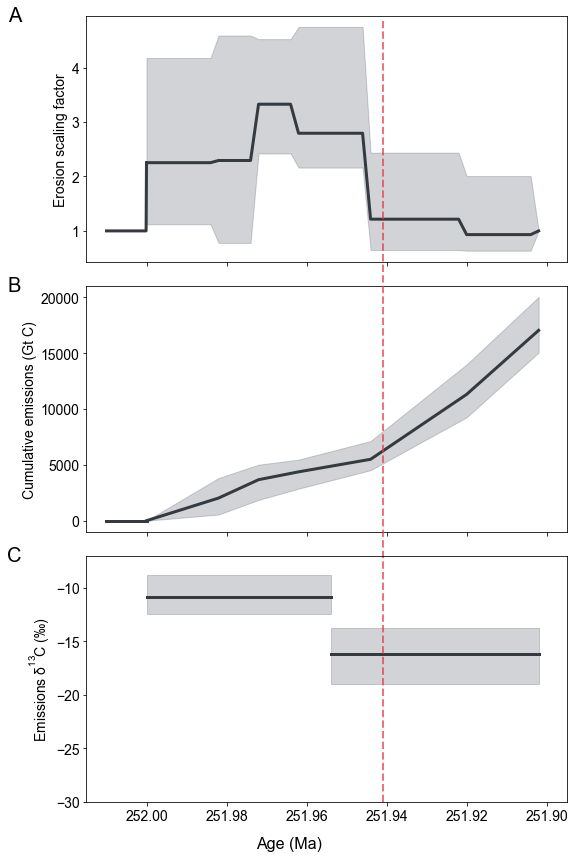

In [255]:

savefig = 1

fig, axes = plt.subplots(figsize = (8,12),nrows=3, ncols=1, sharex=True)

plt.ticklabel_format(useOffset=False)


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

proxy_color = '#ED1B24'
proxy_interval = '#FE9C43'
model_color = '#343a40'
model_interval = '#1b263b'

alpha = 0.2

# Fig. 4a Erosion
axes[0].plot(Age/-1e6, fe_m(Age/1e6), lw = 3, color = model_color, label = 'Model results')
axes[0].plot([252.01, 252.0001,Age[0]/-1e6], [1,1,fe_m(Age[0]/1e6) ], lw = 3, color = model_color)
axes[0].fill_between(Age/-1e6, fe_lower(Age/1e6), fe_upper(Age/1e6), color = model_interval, alpha = alpha)


# Fig. 4b Carbon emission
axes[1].plot(cum_emi_q.index, cum_emi_q.iloc[:,5], lw = 3, color = model_color, label = 'Model results')
axes[1].fill_between(cum_emi_q.index, cum_emi_q.iloc[:,0], cum_emi_q.iloc[:,4], color = model_interval, alpha = alpha)
axes[1].plot([252.01, 252], [0,0 ], lw = 3, color = model_color)


# Fig. 4c d13c
axes[2].plot(np.array([-252e6, -251.954e6])/-1e6, [pd_d13c_emi_q['mean'][1], pd_d13c_emi_q['mean'][1]],lw = 3, color = model_color, )
axes[2].fill_between(np.array([-252e6, -251.954e6])/-1e6,  [c1l, c1l] , [c1h, c1h], color = model_interval, alpha = alpha)

axes[2].plot(np.array([-251.954e6, -251.902e6])/-1e6, [pd_d13c_emi_q['mean'][2], pd_d13c_emi_q['mean'][2]],lw = 3, color = model_color, )
axes[2].fill_between(np.array([-251.954e6, -251.902e6])/-1e6,  [c2l, c2l] , [c2h, c2h], color = model_interval, alpha = alpha)
axes[2].set_ylim([-30, -7])
# axes[2].legend(handles[:] , labels[:] ,
#               loc = 'lower right', 
#               framealpha = 0, 
#               borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12) 


# yaxis
axes[0].set_ylabel(r'Erosion scaling factor')
axes[1].set_ylabel(r'Cumulative emissions (Gt C)')
axes[2].set_ylabel(r"Emissions $\delta^{13}\!C$ (" + u"\u2030" + ")")

# ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# axes[3].set_ylabel('Cumulative emissions (Gt C)')



# xaxis
fig.supxlabel('Age (Ma)', fontsize = 16)

# x range
plt.setp(axes, xlim=[251.895, 252.015])

# # legend

# axes[0].legend( borderaxespad=0.2, borderpad=0.8, labelspacing=0.6,
#                   edgecolor='white', fontsize=12, loc = 'center right', bbox_to_anchor = (0.95,1.1),
#                 ncol = 3 )
# axes[2].plot([0.49, 0.49], [0.06, 0.99], color='#ae2012', lw=2, ls = '--', 
#          transform=fig.transFigure, clip_on=False)

handles, labels = axes[2].get_legend_handles_labels()

axes[0].text(-0.15, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes)
axes[1].text(-0.15, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1].transAxes)
axes[2].text(-0.15, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2].transAxes)

plt.tight_layout()
plt.gca().invert_xaxis()

# axes[2].plot([251.941, 251.941], [-20, 21], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

axes[2].plot([251.941, 251.941], [-30, 43], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)


if savefig:
    plt.savefig(f'Fig4_MCMC_forcing_{exp_name}_{version}.png', dpi = 1200)
    plt.savefig(f'Fig4_MCMC_forcing_{exp_name}_{version}.pdf', dpi = 1200)
    plt.savefig(f'Fig4_MCMC_forcing_{exp_name}_{version}.svg', format = 'svg', dpi = 1200)

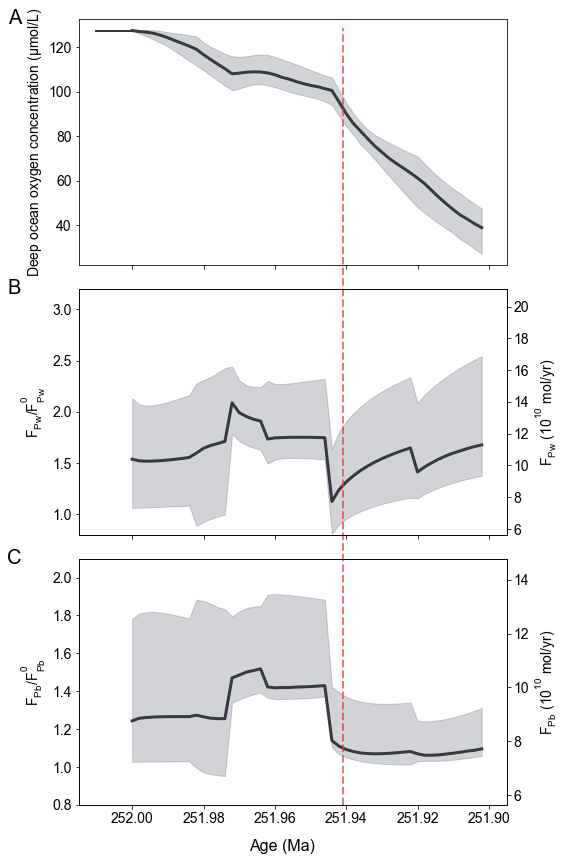

In [256]:
# extended datafigure 1, silicate weathering flux evolution

savefig = 1

fig, axes = plt.subplots(figsize = (8,12),nrows=3, ncols=1, sharex=True)

plt.ticklabel_format(useOffset=False)


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

proxy_color = '#ED1B24'
proxy_interval = '#FE9C43'
model_color = '#343a40'
model_interval = '#1b263b'

alpha = 0.2

# Fig. s1a deep oxygen
unit_convert = 1000
axes[0].plot(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,1]*unit_convert, lw = 3, color = model_color)
axes[0].plot([252.01, (dox_deep_q.index/-1e6)[0]], [0.12740*unit_convert, 0.12740*unit_convert], lw = 2, color = model_color)

axes[0].fill_between(dox_deep_q.index/-1e6, dox_deep_q.iloc[:,0]*unit_convert, dox_deep_q.iloc[:,2]*unit_convert, color = model_interval, alpha = alpha)

# Fig. s1b fpw


axes[1].plot(r_fpw_q.index/-1e6, r_fpw_q.iloc[:,1], lw = 3, color = model_color, label = 'Model results')
axes[1].fill_between(r_fpw_q.index/-1e6, r_fpw_q.iloc[:,0], r_fpw_q.iloc[:,2], color = model_interval, alpha = alpha)

ax1 = axes[1].twinx()
axes[1].set_ylim([0.8,3.2])
ax1.set_ylim([0.8*7.04, 3*7.04])
ax1.ticklabel_format(useOffset=False)

axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


# Fig. s1c fbp
axes[2].plot(fbP_q.index/-1e6, fbP_q.iloc[:,1]/7.4e10, lw = 3, color = model_color, label = 'Model results')
axes[2].fill_between(fbP_q.index/-1e6, fbP_q.iloc[:,0]/7.04e10, fbP_q.iloc[:,2]/7.04e10, color = model_interval, alpha = alpha)

ax2 = axes[2].twinx()
axes[2].set_ylim([0.8,2.1])
ax2.set_ylim([0.8*7.04, 2.1*7.04])




# yaxis
axes[0].set_ylabel(r'Deep ocean oxygen concentration ($\mu$mol/L)')
axes[1].set_ylabel(r'F$_{Pw}$/F$_{Pw}^0$')
axes[2].set_ylabel(r'F$_{Pb}$/F$_{Pb}^0$')

ax1.set_ylabel(r'F$_{Pw}$ (10$^{10}$ mol/yr)')
ax2.set_ylabel(r'F$_{Pb}$ (10$^{10}$ mol/yr)')

# ax.set_ylabel(r'Emissions (Gt C $yr^{-1}$)')
# axes[3].set_ylabel('Cumulative emissions (Gt C)')



# xaxis
fig.supxlabel('Age (Ma)', fontsize = 16)

# x range
plt.setp(axes, xlim=[251.895, 252.015])



axes[0].text(-0.15, 1.0, 'A', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes)
axes[1].text(-0.15, 1.0, 'B', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[1].transAxes)
axes[2].text(-0.15, 1.0, 'C', color='k', fontsize=20, horizontalalignment='center', verticalalignment='center', transform = axes[2].transAxes)

plt.tight_layout()
plt.gca().invert_xaxis()

axes[2].plot([251.941, 251.941], [0.8, 4.9], color='#e63946', lw=2, ls = '--',  alpha = 0.7, clip_on = False)

if savefig:
    plt.savefig(f'FigS1_Pflux_{exp_name}_{version}.png', dpi = 1200)
    plt.savefig(f'FigS1_Pflux_{exp_name}_{version}.pdf', dpi = 1200)
    plt.savefig(f'FigS1_Pflux_{exp_name}_{version}.svg', format = 'svg', dpi = 1200)